In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import numpy as np


In [2]:

 
url = 'https://ticker.finology.in/company/RELIANCE'  # Replace this with the target website URL
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(url, headers=headers)
 
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')




<!DOCTYPE html>
<html>
<head>
    <!-- Global site tag (gtag.js) - Google Analytics -->
    <script async src="https://www.googletagmanager.com/gtag/js?id=UA-136614031-6"></script>
    <script>
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date());
        gtag('config', 'UA-136614031-6');
    </script>

    <title>
	Reliance Industries Ltd. Share Price Today, Market Cap, Price Chart, Balance Sheet
</title><meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" /><link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" integrity="sha384-Vkoo8x4CGsO3+Hhxv8T/Q5PaXtkKtu6ug5TOeNV6gBiFeWPGFN9MuhOf23Q9Ifjh" crossorigin="anonymous" /><link href="https://fonts.googleapis.com/css?family=Hind:300,400,500,600,700|Source+Sans+Pro:400,600,700" rel="stylesheet" />
    <script src="https://cdnjs.cloudflare.com/ajax/lib

In [3]:
data_extracted = BeautifulSoup(response.text, 'html.parser')

In [4]:
text = data_extracted.find("div",{"class": "innerpagecontent"}).find("div", {"id": "mainContent_divCompanyEssentials"}).text

In [5]:

# Use regular expressions to extract relevant information
market_cap = re.search(r'Market Cap[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
enterprise_value = re.search(r'Enterprise Value[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
no_of_shares = re.search(r'No. of Shares[\s\S]*?([\d.]+) Cr.', text).group(1)
pe_ratio = re.search(r'P/E[\s\S]*?([\d.]+)', text).group(1)
pb_ratio = re.search(r'P/B[\s\S]*?([\d.]+)', text).group(1)
face_value = re.search(r'Face Value[\s\S]*?₹ (\d+)', text).group(1)
div_yield = re.search(r'Div. Yield[\s\S]*?([\d.]+) %', text).group(1)
book_value = re.search(r'Book Value \(TTM\)[\s\S]*?₹ ([\d.]+)', text).group(1)
cash = re.search(r'CASH[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
debt = re.search(r'DEBT[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
promoter_holding = re.search(r'Promoter Holding[\s\S]*?(\d+) %', text).group(1)

sales_growth = re.search(r'Sales Growth[\s\S]*?([\d.]+)%', text).group(1)
roe = re.search(r'ROE[\s\S]*?([\d.]+) %', text).group(1)
roce = re.search(r'ROCE[\s\S]*?([\d.]+)%', text).group(1)

# Print or format the extracted information

print(f"Market Cap: ₹ {market_cap} Cr.")
print(f"Enterprise Value: ₹ {enterprise_value} Cr.")
print(f"No. of Shares: {no_of_shares} Cr.")
print(f"P/E Ratio: {pe_ratio}")
print(f"P/B Ratio: {pb_ratio}")
print(f"Face Value: ₹ {face_value}")
print(f"Div. Yield: {div_yield}%")
print(f"Book Value (TTM): ₹ {book_value}")
print(f"Cash: ₹ {cash} Cr.")
print(f"Debt: ₹ {debt} Cr.")
print(f"Sales Growth: {sales_growth}%")
print(f"ROE: {roe}%")
print(f"ROCE: {roce}%")


Market Cap: ₹ 1620009.48 Cr.
Enterprise Value: ₹ 1779021.48 Cr.
No. of Shares: 676.61 Cr.
P/E Ratio: 37.56
P/B Ratio: 3.28
Face Value: ₹ 10
Div. Yield: 50.27%
Book Value (TTM): ₹ 56811
Cash: ₹ 56811 Cr.
Debt: ₹ 215823 Cr.
Sales Growth: 25.1%
ROE: 9.05%
ROCE: 9.81%


In [20]:
# giving basic information about the company
def company_basics(companuy):
    url = 'https://ticker.finology.in/company/RELIANCE'
    data_dict = {}
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        market_cap = re.search(r'Market Cap[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
        enterprise_value = re.search(r'Enterprise Value[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
        no_of_shares = re.search(r'No. of Shares[\s\S]*?([\d.]+) Cr.', text).group(1)
        pe_ratio = re.search(r'P/E[\s\S]*?([\d.]+)', text).group(1)
        pb_ratio = re.search(r'P/B[\s\S]*?([\d.]+)', text).group(1)
        face_value = re.search(r'Face Value[\s\S]*?₹ (\d+)', text).group(1)
        div_yield = re.search(r'Div. Yield[\s\S]*?([\d.]+) %', text).group(1)
        book_value = re.search(r'Book Value \(TTM\)[\s\S]*?₹ ([\d.]+)', text).group(1)
        cash = re.search(r'CASH[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
        debt = re.search(r'DEBT[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
        promoter_holding = re.search(r'Promoter Holding[\s\S]*?(\d+) %', text).group(1)
        sales_growth = re.search(r'Sales Growth[\s\S]*?([\d.]+)%', text).group(1)
        roe = re.search(r'ROE[\s\S]*?([\d.]+) %', text).group(1)
        roce = re.search(r'ROCE[\s\S]*?([\d.]+)%', text).group(1)
        data_dict = {'market_cap(in Cr.)':market_cap,'enterprise_value (    in Cr.)':enterprise_value,'no_of_shares (in Cr.)':no_of_shares,'pe_ratio':pe_ratio,'pb_ratio':pb_ratio,
                     'face_value':face_value,'div_yield':div_yield,'book_value (in Rs.)':book_value,'cash(in Cr.)':cash,'debt (in Cr.)':debt,'promoter_holding(%)':promoter_holding,'sales_growth(%)':sales_growth,'roe(%)':roe,'roce(%)':roce}
        alfa = pd.DataFrame(data_dict)
        return alfa

        
    else:
        print(f'Request failed with status code: {response.status_code}')
    

<h1> qutarley result </h1>

In [21]:

 
url = 'https://ticker.finology.in/company/RELIANCE'  # Replace this with the target website URL
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(url, headers=headers)
 
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')



<!DOCTYPE html>
<html>
<head>
    <!-- Global site tag (gtag.js) - Google Analytics -->
    <script async src="https://www.googletagmanager.com/gtag/js?id=UA-136614031-6"></script>
    <script>
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date());
        gtag('config', 'UA-136614031-6');
    </script>

    <title>
	Reliance Industries Ltd. Share Price Today, Market Cap, Price Chart, Balance Sheet
</title><meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" /><link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" integrity="sha384-Vkoo8x4CGsO3+Hhxv8T/Q5PaXtkKtu6ug5TOeNV6gBiFeWPGFN9MuhOf23Q9Ifjh" crossorigin="anonymous" /><link href="https://fonts.googleapis.com/css?family=Hind:300,400,500,600,700|Source+Sans+Pro:400,600,700" rel="stylesheet" />
    <script src="https://cdnjs.cloudflare.com/ajax/lib

In [22]:
data = BeautifulSoup(response.text, 'html.parser')


In [26]:
data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "mainContent_quarterly"})\
.find("div", {"class": "col-12"}).find("div",{"class": "card cardscreen"}).find("table")
data_extracted

<table class="table table-sm table-hover screenertable table-responsive-sm">
<thead>
<tr>
<th scope="col">PARTICULARS</th>
<th scope="col">Sep 2022</th>
<th scope="col">Dec 2022</th>
<th scope="col">Mar 2023</th>
<th scope="col">Jun 2023</th>
<th scope="col">Sep 2023</th>
</tr>
</thead>
<tbody>
<tr class="">
<th scope="row">Net Sales <span class="infolink" data-tooltip="tooltip" title="It is companys core revenue net of discounts and returns."><i class="fas fa-info-circle"></i></span></th>
<td>
<span class="Number">
                                                    140154
                                                </span>
</td>
<td>
<span class="Number">
                                                    129415
                                                </span>
</td>
<td>
<span class="Number">
                                                    122133
                                                </span>
</td>
<td>
<span class="Number">
                                  

In [29]:
x = data_extracted.find_all("th")
rows = []
col = []
for i in x:
    alfa = i.get("scope")
    if(alfa == "col"):

        col.append(i.text)
    else:
        rows.append(i.text)



In [41]:
len(rows)

11

In [56]:
x_data = data_extracted.find_all("td")
alfa = []
temp_file = []
for i in x_data:

    temp_text = i.text
    temp_file.append(float(temp_text.strip()))
    if(len(temp_file) == 5):
        alfa.append(temp_file)
        temp_file = []

    

In [57]:
alfa

[[140154.0, 129415.0, 122133.0, 120408.0, 140450.0],
 [128369.0, 114381.0, 104063.0, 104047.0, 121259.0],
 [11785.0, 15034.0, 18070.0, 16361.0, 19191.0],
 [3334.0, 2579.0, 2785.0, 2895.0, 2934.0],
 [2916.0, 3349.0, 3745.0, 3596.0, 3239.0],
 [2611.0, 2532.0, 2734.0, 2819.0, 4384.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [9592.0, 11732.0, 14376.0, 12841.0, 14502.0],
 [2842.0, 3359.0, 555.0, 3115.0, 3294.0],
 [6750.0, 8373.0, 13821.0, 9726.0, 11208.0],
 [9.98, 12.38, 20.43, 14.37, 16.57]]

In [58]:
rows

['Net Sales ',
 'Total Expenditure ',
 'Operating Profit ',
 'Other Income ',
 'Interest ',
 'Depreciation ',
 'Exceptional Items ',
 'Profit Before Tax ',
 'Tax ',
 'Profit After Tax ',
 'Adjusted EPS (Rs) ']

In [59]:
col

['PARTICULARS', 'Sep 2022', 'Dec 2022', 'Mar 2023', 'Jun 2023', 'Sep 2023']

In [60]:
# creating a dummy dataframe
dummy = pd.DataFrame(alfa,columns=col[1:], index =rows)
dummy

,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023
Net Sales,140154.00,129415.00,122133.00,120408.00,140450.00
Total Expenditure,128369.00,114381.00,104063.00,104047.00,121259.00
Operating Profit,11785.00,15034.00,18070.00,16361.00,19191.00
Other Income,3334.00,2579.00,2785.00,2895.00,2934.00
Interest,2916.00,3349.00,3745.00,3596.00,3239.00
Depreciation,2611.00,2532.00,2734.00,2819.00,4384.00
Exceptional Items,0.00,0.00,0.00,0.00,0.00
Profit Before Tax,9592.00,11732.00,14376.00,12841.00,14502.00
Tax,2842.00,3359.00,555.00,3115.00,3294.00
Profit After Tax,6750.00,8373.00,13821.00,9726.00,11208.00


In [61]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Net Sales  to Adjusted EPS (Rs) 
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sep 2022  11 non-null     float64
 1   Dec 2022  11 non-null     float64
 2   Mar 2023  11 non-null     float64
 3   Jun 2023  11 non-null     float64
 4   Sep 2023  11 non-null     float64
dtypes: float64(5)
memory usage: 528.0+ bytes


<h1> Final Function </h1>

In [63]:
def quarterly_financials(company):
    url = 'https://ticker.finology.in/company/{}'.format(company)  # Replace this with the target website URL
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    if(response.status_code == 200):
        data = BeautifulSoup(response.text, 'html.parser')
        data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "mainContent_quarterly"})\
            .find("div", {"class": "col-12"}).find("div",{"class": "card cardscreen"}).find("table")
        # extracted rows 
        rows = ['Net Sales ','Total Expenditure ','Operating Profit ','Other Income ','Interest ','Depreciation ','Exceptional Items ','Profit Before Tax ','Tax ',
                'Profit After Tax ','Adjusted EPS (Rs) ']
        cols = [ 'Sep 2022', 'Dec 2022', 'Mar 2023', 'Jun 2023', 'Sep 2023']
        # main data
        x_data = data_extracted.find_all("td")
        alfa = []
        temp_file = []
        for i in x_data:
            temp_text = i.text
            temp_file.append(float(temp_text.strip()))
            if(len(temp_file) == 5):
                alfa.append(temp_file)
                temp_file = []
        dummy = pd.DataFrame(alfa,columns=cols, index =rows)
        return dummy
        
        
        
    else:
        print("Request failed with status code: {}".format(response.status_code))

In [64]:
quarterly_financials("RELIANCE")

,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023
Net Sales,140154.00,129415.00,122133.00,120408.00,140450.00
Total Expenditure,128369.00,114381.00,104063.00,104047.00,121259.00
Operating Profit,11785.00,15034.00,18070.00,16361.00,19191.00
Other Income,3334.00,2579.00,2785.00,2895.00,2934.00
Interest,2916.00,3349.00,3745.00,3596.00,3239.00
Depreciation,2611.00,2532.00,2734.00,2819.00,4384.00
Exceptional Items,0.00,0.00,0.00,0.00,0.00
Profit Before Tax,9592.00,11732.00,14376.00,12841.00,14502.00
Tax,2842.00,3359.00,555.00,3115.00,3294.00
Profit After Tax,6750.00,8373.00,13821.00,9726.00,11208.00


In [71]:
alfa_dummy = dummy.T

In [76]:
alfa_dummy.columns

Index(['Net Sales ', 'Total Expenditure ', 'Operating Profit ',
       'Other Income ', 'Interest ', 'Depreciation ', 'Exceptional Items ',
       'Profit Before Tax ', 'Tax ', 'Profit After Tax ',
       'Adjusted EPS (Rs) '],
      dtype='object')

<Axes: >

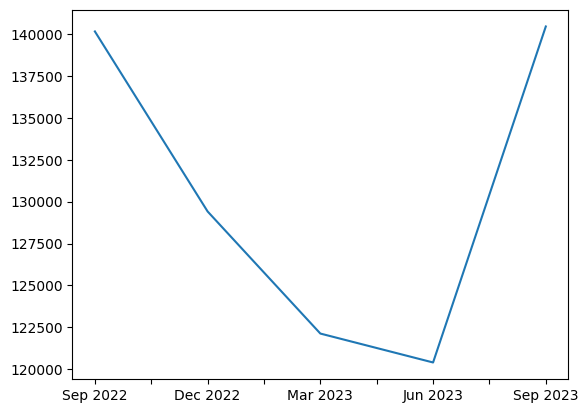

In [78]:
alfa_dummy['Net Sales '].plot()

<h1> balance sheet data </h1>

In [79]:

 
url = 'https://ticker.finology.in/company/RELIANCE'  # Replace this with the target website URL
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(url, headers=headers)
 
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')



<!DOCTYPE html>
<html>
<head>
    <!-- Global site tag (gtag.js) - Google Analytics -->
    <script async src="https://www.googletagmanager.com/gtag/js?id=UA-136614031-6"></script>
    <script>
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date());
        gtag('config', 'UA-136614031-6');
    </script>

    <title>
	Reliance Industries Ltd. Share Price Today, Market Cap, Price Chart, Balance Sheet
</title><meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" /><link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" integrity="sha384-Vkoo8x4CGsO3+Hhxv8T/Q5PaXtkKtu6ug5TOeNV6gBiFeWPGFN9MuhOf23Q9Ifjh" crossorigin="anonymous" /><link href="https://fonts.googleapis.com/css?family=Hind:300,400,500,600,700|Source+Sans+Pro:400,600,700" rel="stylesheet" />
    <script src="https://cdnjs.cloudflare.com/ajax/lib

In [93]:
data = BeautifulSoup(response.text, 'html.parser')
data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "balance"}).find("table")
th_data = data_extracted.find_all("th")
rows = []
cols = []
for i in th_data:
    temp_data = i.get("scope")
    if(temp_data == "col"):
        cols.append(i.text)
    else:
        rows.append(i.text)
rows

['Equity and Liabilities',
 'Share Capital ',
 'Total Reserves ',
 'Borrowings ',
 'Other N/C liabilities ',
 'Current liabilities ',
 'Total Liabilities ',
 'Assets',
 'Net Block ',
 'Capital WIP ',
 'Intangible WIP ',
 'Investments ',
 'Loans & Advances ',
 'Other N/C Assets ',
 'Current Assets ',
 'Total Assets ']

In [94]:
cols

['Particulars', 'Mar 2019', 'Mar 2020', 'Mar 2021', 'Mar 2022', 'Mar 2023']

In [107]:
def balance_sheet(company):
    url = 'https://ticker.finology.in/company/{}'.format(company)  # Replace this with the target website URL
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    if(response.status_code == 200):
        data = BeautifulSoup(response.text, 'html.parser')
        data_extracted = data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "balance"}).find("table")
        # extracted rows 
        rows = ['Share Capital ','Total Reserves ','Borrowings ',
                'Other N/C liabilities ','Current liabilities ','Total Liabilities ','Net Block ','Capital WIP ',
                'Intangible WIP ','Investments ','Loans & Advances ','Other N/C Assets ','Current Assets ','Total Assets ']
        cols = [  'Mar 2019', 'Mar 2020', 'Mar 2021', 'Mar 2022', 'Mar 2023']
        # main data
        x_data = data_extracted.find_all("td")
        alfa = []
        temp_file = []
        for i in x_data:
            temp_text = i.text
            temp_text = temp_text.strip()

            print(temp_text)
            if(temp_text != ''):
                temp_file.append(temp_text)
            if(len(temp_file) == 5):
                alfa.append(temp_file)
                temp_file = []

        print(alfa)
        dummy = pd.DataFrame(alfa,columns=cols, index =rows)
        return dummy
        
        
        
    else:
        print("Request failed with status code: {}".format(response.status_code))

In [108]:
balance_sheet("RELIANCE")






6339
6339
6445
6765
6766
398983
384876
468038
464762
472328
118098
194402
160598
167231
135561
59744
62600
38313
39721
45071
202021
330682
201787
200982
237276
785185
978899
875181
879461
897002





203188
306478
306833
239626
245164
105155
15638
20765
19267
30958
6402
12327
12070
15395
17957
272043
421793
252620
330493
303558
44335
55978
71203
50568
31735
1198
31
971
1714
1698
152864
166654
210719
222398
265932
785185
978899
875181
879461
897002
[['6339', '6339', '6445', '6765', '6766'], ['398983', '384876', '468038', '464762', '472328'], ['118098', '194402', '160598', '167231', '135561'], ['59744', '62600', '38313', '39721', '45071'], ['202021', '330682', '201787', '200982', '237276'], ['785185', '978899', '875181', '879461', '897002'], ['203188', '306478', '306833', '239626', '245164'], ['105155', '15638', '20765', '19267', '30958'], ['6402', '12327', '12070', '15395', '17957'], ['272043', '421793', '252620', '330493', '303558'], ['44335', '55978', '71203', '50568', '31735'], 

,Mar 2019,Mar 2020,Mar 2021,Mar 2022,Mar 2023
Share Capital,6339,6339,6445,6765,6766
Total Reserves,398983,384876,468038,464762,472328
Borrowings,118098,194402,160598,167231,135561
Other N/C liabilities,59744,62600,38313,39721,45071
Current liabilities,202021,330682,201787,200982,237276
Total Liabilities,785185,978899,875181,879461,897002
Net Block,203188,306478,306833,239626,245164
Capital WIP,105155,15638,20765,19267,30958
Intangible WIP,6402,12327,12070,15395,17957
Investments,272043,421793,252620,330493,303558


<h1> cash flows </h1>

In [3]:
url = 'https://ticker.finology.in/company/RELIANCE'  # Replace this with the target website URL
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(url, headers=headers)
 
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')



<!DOCTYPE html>
<html>
<head>
    <!-- Global site tag (gtag.js) - Google Analytics -->
    <script async src="https://www.googletagmanager.com/gtag/js?id=UA-136614031-6"></script>
    <script>
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date());
        gtag('config', 'UA-136614031-6');
    </script>

    <title>
	Reliance Industries Ltd. Share Price Today, Market Cap, Price Chart, Balance Sheet
</title><meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" /><link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" integrity="sha384-Vkoo8x4CGsO3+Hhxv8T/Q5PaXtkKtu6ug5TOeNV6gBiFeWPGFN9MuhOf23Q9Ifjh" crossorigin="anonymous" /><link href="https://fonts.googleapis.com/css?family=Hind:300,400,500,600,700|Source+Sans+Pro:400,600,700" rel="stylesheet" />
    <script src="https://cdnjs.cloudflare.com/ajax/lib

In [5]:
data = BeautifulSoup(response.text, 'html.parser')
data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "mainContent_cashflows"}).find("table")
th_data = data_extracted.find_all("th")
rows = []
cols = []
for i in th_data:
    temp_data = i.get("scope")
    if(temp_data == "col"):
        cols.append(i.text)
    else:
        rows.append(i.text)
rows

['Profit from operations ',
 'Adjustment ',
 'Changes in Assets & Liabilities ',
 'Tax Paid ',
 'Operating Cash Flow ',
 'Investing Cash Flow ',
 'Financing Cash Flow ',
 'Net Cash Flow ']

In [6]:
cols

['PARTICULARS', 'Mar 2019', 'Mar 2020', 'Mar 2021', 'Mar 2022', 'Mar 2023']

In [10]:
def cash_flows(company):
    url = 'https://ticker.finology.in/company/{}'.format(company)  # Replace this with the target website URL
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    if(response.status_code == 200):
        data = BeautifulSoup(response.text, 'html.parser')
        data_extracted = data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "mainContent_cashflows"}).find("table")
        # extracted rows 
        rows = ['Profit from operations ','Adjustment ','Changes in Assets & Liabilities ','Tax Paid ','Operating Cash Flow ','Investing Cash Flow ','Financing Cash Flow ','Net Cash Flow ']
        cols = [  'Mar 2019', 'Mar 2020', 'Mar 2021', 'Mar 2022', 'Mar 2023']
        # main data
        x_data = data_extracted.find_all("td")
        alfa = []
        temp_file = []
        for i in x_data:
            temp_text = i.text
            temp_text = temp_text.strip()

            #print(temp_text)
            if(temp_text != ''):
                temp_file.append(temp_text)
            if(len(temp_file) == 5):
                alfa.append(temp_file)
                temp_file = []

        #print(alfa)
        dummy = pd.DataFrame(alfa,columns=cols, index =rows)
        return dummy
        
        
        
    else:
        print("Request failed with status code: {}".format(response.status_code))

In [11]:
cash_flows("RELIANCE")

47367
40316
27212
46786
55572



10536
8940
5974
8348
9613



-19286
33531
-32008
13820
-12220



-9426
-5254
-1690
-1463
-4915



29191
77533
-512
67491
48050



-53949
-143583
74257
-45315
-5584



25795
70767
-76657
-6035
-7369



1037
4717
-2912
16141
35097



[['47367', '40316', '27212', '46786', '55572'], ['10536', '8940', '5974', '8348', '9613'], ['-19286', '33531', '-32008', '13820', '-12220'], ['-9426', '-5254', '-1690', '-1463', '-4915'], ['29191', '77533', '-512', '67491', '48050'], ['-53949', '-143583', '74257', '-45315', '-5584'], ['25795', '70767', '-76657', '-6035', '-7369'], ['1037', '4717', '-2912', '16141', '35097']]


,Mar 2019,Mar 2020,Mar 2021,Mar 2022,Mar 2023
Profit from operations,47367,40316,27212,46786,55572
Adjustment,10536,8940,5974,8348,9613
Changes in Assets & Liabilities,-19286,33531,-32008,13820,-12220
Tax Paid,-9426,-5254,-1690,-1463,-4915
Operating Cash Flow,29191,77533,-512,67491,48050
Investing Cash Flow,-53949,-143583,74257,-45315,-5584
Financing Cash Flow,25795,70767,-76657,-6035,-7369
Net Cash Flow,1037,4717,-2912,16141,35097


<h1>getting  all the important ratio of the company</h1>


In [2]:
#  ignore those companies whose ratios are not found in the website
all_company_list  = "https://www.moneycontrol.com/india/stockpricequote?classic=true"


In [5]:
# extract all the commpany information

 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(all_company_list, headers=headers)
 
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')

 <html>
 <head>
 <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
 <title>Stock Quotes|Company Stock Price quotes|NSE/ BSE Listed Company Stocks|Indian Stock Market</title>
 <meta name="description" content="Get all Indian company stock quotes listed in the share market. NSE/ BSE Listed companies stock price quotes list, top company stock list on Moneycontrol.">
 <meta name="keywords" content="Stock Market Quotes, Company Stock Quotes, Share Market Price & Chart Quotes">
<link rel="canonical" href="https://www.moneycontrol.com/india/stockpricequote/" />
<meta property="og:url" content="https://www.moneycontrol.com/india/stockpricequote?classic=true" />
<meta property="og:title" content="Stock Quotes|Company Stock Price quotes|NSE/ BSE Listed Company Stocks|Indian Stock Market" />
<meta property="og:description" content="Get all Indian company stock quotes listed in the share market. NSE/ BSE Listed companies stock price quotes list, top company stock list on Moneyc

In [2]:
def company_list_extraction():
   
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    
    for i in all_list:
        response = requests.get("https://www.moneycontrol.com/india/stockpricequote/{}".format(i), headers=headers)
        if response.status_code == 200:
            return response.text
            # Print the content of the response
            
        else:
            print(f'Request failed with status code: {response.status_code}')
            break

        

In [3]:
raw_data = data_extraction()
raw_data

' <html>\n <head>\n <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n <title>Stock Starting with \'A\', List of Companies Stock Starting with \'A\', Stock Symbol with \'A\' at Moneycontrol</title>\n<meta name="description" content="Complete List of stock/share starting with alphabet \'A\', with Indian companies stocks with price and charts starting with letter \'A\' on Moneycontrol">\n<meta name="keywords" content="Stock Market Quotes, Company Stock Quotes, Share Market Price & Chart Quotes">\n<meta name="Author" content="Moneycontrol.com" />\n\n<!-- OG Share Properties -> Start -->\n<meta property="og:url" content="https://www.moneycontrol.com/india/stockpricequote/A" /> \n<meta property="og:title" content="Stock Starting with \'A\', List of Companies Stock Starting with \'A\', Stock Symbol with \'A\' at Moneycontrol" />\n<meta property="og:description" content="Complete List of stock/share starting with alphabet \'A\', with Indian companies stocks with price and

In [4]:
data_area = BeautifulSoup(raw_data, 'html.parser')

In [8]:
target_area = data_area.find("div",{"class": "PT15"}).find("table",{"class": "pcq_tbl MT10"})
for i in target_area.find_all("td"):
    link = i.find("a").get("href")
    print(link)

https://www.moneycontrol.com/india/stockpricequote/miscellaneous/amfebcon/F03
https://www.moneycontrol.com/india/stockpricequote/miscellaneous/amjumbobags/JB03
https://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/abinfrabuild/I07
https://www.moneycontrol.com/india/stockpricequote/miscellaneous/afenterprises/AFE01
https://www.moneycontrol.com/india/stockpricequote/trading/aguniversal/U02
https://www.moneycontrol.com/india/stockpricequote/financeleasinghirepurchase/akscredits/AKS
https://www.moneycontrol.com/india/stockpricequote/miscellaneous/akspintex/AKS01
https://www.moneycontrol.com/india/stockpricequote/textilesspinningcottonblended/aptyarns/APT01
https://www.moneycontrol.com/india/stockpricequote/chemicals/a1acid/AA14
https://www.moneycontrol.com/india/stockpricequote/financegeneral/akcapitalservices/AKC01
https://www.moneycontrol.com/india/stockpricequote/powertransmissionequipment/a2zinfraengineering/AME02
https://www.moneycontrol.com/india/stockpricequote/aa

new data

https://www.moneycontrol.com/financials/amfebcon/ratiosVI/F03#F03
https://www.moneycontrol.com/financials/amfebcon/ratiosVI/F03#F03


<h1> extrating all financial ratios </h1>

In [151]:
alfa_link = "https://www.moneycontrol.com/financials/thetatapowercompany/ratiosVI/TPC#TPC"

In [182]:
def financial_ratio(url):
    
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    
    
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
            
            return BeautifulSoup(response.text, 'html.parser')
            # Print the content of the response
            
    else:
            
        print(f'Request failed with status code: {response.status_code}')
            

In [153]:
testing_page = financial_ratio(alfa_link)

In [154]:
target_table = testing_page.find_all("table")

    

In [155]:
columns = []
data = []
index = []
for i in target_table[1].find_all("td"):
    target_text = i.text
    if("Mar " in target_text):
        columns.append(target_text)
    elif(target_text != "" and target_text.isprintable()):  # type: ignore
        try:
            target_text = target_text.replace(",","")
            alfa = float(target_text)
            data.append(alfa) 
        except:
            if target_text not in ['Per Share Ratios','Profitability Ratios','Liquidity Ratios','Valuation Ratios']:
                index.append(target_text)

In [156]:
columns

['Mar 23', 'Mar 22', 'Mar 21', 'Mar 20', 'Mar 19']

In [157]:
data

[10.22,
 8.61,
 2.49,
 0.08,
 5.9,
 10.22,
 8.61,
 2.49,
 0.08,
 5.9,
 13.88,
 12.26,
 4.98,
 3.08,
 8.88,
 42.87,
 34.05,
 52.82,
 50.88,
 52.46,
 42.87,
 34.05,
 52.82,
 50.88,
 52.46,
 2.0,
 1.75,
 1.55,
 1.55,
 1.3,
 55.48,
 34.76,
 19.34,
 28.56,
 30.52,
 17.83,
 14.19,
 9.59,
 12.96,
 12.79,
 14.17,
 10.64,
 7.5,
 10.42,
 10.45,
 12.86,
 8.63,
 3.34,
 1.3,
 8.68,
 10.23,
 8.71,
 2.88,
 0.55,
 6.54,
 32.13,
 40.82,
 49.6,
 45.35,
 41.89,
 25.54,
 30.61,
 38.78,
 36.48,
 34.23,
 23.18,
 24.82,
 17.28,
 4.53,
 28.43,
 18.43,
 25.05,
 14.9,
 1.91,
 21.42,
 23.85,
 25.57,
 5.45,
 1.07,
 12.46,
 15.29,
 10.44,
 7.41,
 10.82,
 11.09,
 6.78,
 5.9,
 2.14,
 0.39,
 4.63,
 1.6,
 2.27,
 1.11,
 1.17,
 1.09,
 0.37,
 0.25,
 14.41,
 0.2,
 21.64,
 0.44,
 0.58,
 0.5,
 0.51,
 0.55,
 0.3,
 0.42,
 0.44,
 0.45,
 0.51,
 0.0,
 0.0,
 9.76,
 0.0,
 14.25,
 17.11,
 17.79,
 45.49,
 237.63,
 19.9,
 12.6,
 12.64,
 26.36,
 42.21,
 14.65,
 82.89,
 82.21,
 54.51,
 -137.63,
 80.1,
 87.4,
 87.36,
 73.64,
 57.79,
 85

In [158]:
final_data_list = []
len_1 = len(columns)
temp_data = []
len_2 = 0
for i in data:
    temp_data.append(i)
    len_2 += 1
    if(len_2 == len_1):
        final_data_list.append(temp_data)
        temp_data = []
        len_2 = 0
final_data_list

[[10.22, 8.61, 2.49, 0.08, 5.9],
 [10.22, 8.61, 2.49, 0.08, 5.9],
 [13.88, 12.26, 4.98, 3.08, 8.88],
 [42.87, 34.05, 52.82, 50.88, 52.46],
 [42.87, 34.05, 52.82, 50.88, 52.46],
 [2.0, 1.75, 1.55, 1.55, 1.3],
 [55.48, 34.76, 19.34, 28.56, 30.52],
 [17.83, 14.19, 9.59, 12.96, 12.79],
 [14.17, 10.64, 7.5, 10.42, 10.45],
 [12.86, 8.63, 3.34, 1.3, 8.68],
 [10.23, 8.71, 2.88, 0.55, 6.54],
 [32.13, 40.82, 49.6, 45.35, 41.89],
 [25.54, 30.61, 38.78, 36.48, 34.23],
 [23.18, 24.82, 17.28, 4.53, 28.43],
 [18.43, 25.05, 14.9, 1.91, 21.42],
 [23.85, 25.57, 5.45, 1.07, 12.46],
 [15.29, 10.44, 7.41, 10.82, 11.09],
 [6.78, 5.9, 2.14, 0.39, 4.63],
 [1.6, 2.27, 1.11, 1.17, 1.09],
 [0.37, 0.25, 14.41, 0.2, 21.64],
 [0.44, 0.58, 0.5, 0.51, 0.55],
 [0.3, 0.42, 0.44, 0.45, 0.51],
 [0.0, 0.0, 9.76, 0.0, 14.25],
 [17.11, 17.79, 45.49, 237.63, 19.9],
 [12.6, 12.64, 26.36, 42.21, 14.65],
 [82.89, 82.21, 54.51, -137.63, 80.1],
 [87.4, 87.36, 73.64, 57.79, 85.35],
 [82349.87, 100956.74, 51600.14, 24744.63, 35348.

In [159]:
index

['Key Financial Ratios of The Tata Power Company (in Rs. Cr.)',
 'Basic EPS (Rs.)',
 'Diluted EPS (Rs.)',
 'Cash EPS (Rs.)',
 'Book Value [ExclRevalReserve]/Share (Rs.)',
 'Book Value [InclRevalReserve]/Share (Rs.)',
 'Dividend / Share(Rs.)',
 'Revenue from Operations/Share (Rs.)',
 'PBDIT/Share (Rs.)',
 'PBIT/Share (Rs.)',
 'PBT/Share (Rs.)',
 'Net Profit/Share (Rs.)',
 'PBDIT Margin (%)',
 'PBIT Margin (%)',
 'PBT Margin (%)',
 'Net Profit Margin (%)',
 'Return on Networth / Equity (%)',
 'Return on Capital Employed (%)',
 'Return on Assets (%)',
 'Total Debt/Equity (X)',
 'Asset Turnover Ratio (%)',
 'Current Ratio (X)',
 'Quick Ratio (X)',
 'Inventory Turnover Ratio (X)',
 'Dividend Payout Ratio (NP) (%)',
 'Dividend Payout Ratio (CP) (%)',
 'Earnings Retention Ratio (%)',
 'Cash Earnings Retention Ratio (%)',
 'Enterprise Value (Cr.)',
 'EV/Net Operating Revenue (X)',
 'EV/EBITDA (X)',
 'MarketCap/Net Operating Revenue (X)',
 'Retention Ratios (%)',
 'Price/BV (X)',
 'Price/Net Op

In [160]:
# creating dataframe
dummy = pd.DataFrame(final_data_list, columns = columns,index = index[1:])
dummy

,Mar 23,Mar 22,Mar 21,Mar 20,Mar 19
Basic EPS (Rs.),10.22,8.61,2.49,0.08,5.90
Diluted EPS (Rs.),10.22,8.61,2.49,0.08,5.90
Cash EPS (Rs.),13.88,12.26,4.98,3.08,8.88
Book Value [ExclRevalReserve]/Share (Rs.),42.87,34.05,52.82,50.88,52.46
Book Value [InclRevalReserve]/Share (Rs.),42.87,34.05,52.82,50.88,52.46
Dividend / Share(Rs.),2.00,1.75,1.55,1.55,1.30
Revenue from Operations/Share (Rs.),55.48,34.76,19.34,28.56,30.52
PBDIT/Share (Rs.),17.83,14.19,9.59,12.96,12.79
PBIT/Share (Rs.),14.17,10.64,7.50,10.42,10.45
PBT/Share (Rs.),12.86,8.63,3.34,1.30,8.68


In [ ]:
test = company_fincancial_ratio("https://www.moneycontrol.com/india/stockpricequote/miscellaneous/amfebcon/F03")
for i in test.find_all('li'):
    temp_link = i.find("a")
    if(temp_link != None):
        title = temp_link.get("title")
        if(title == "Ratios"):
            print(temp_link.get("href"))

In [188]:
# final_ratio function 
def financial_ratio(url):
    
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    
    
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
            
            return BeautifulSoup(response.text, 'html.parser')
            # Print the content of the response
            
    else:
            
        print(f'Request failed with status code: {response.status_code}')

def final_ratio(url):
     testing_page_1 = financial_ratio(url)  # this  is company main web page
     ''' 
     for i in test.find_all('li'):
    temp_link = i.find("a")
    if(temp_link != None):
        title = temp_link.get("title")
        if(title == "Ratios"):
            print(temp_link.get("href"))
     '''
     signal = 0
     for i in testing_page_1.find_all("li"):  #type: ignore
          temp_link = i.find("a")
          if(temp_link != None):
               title = temp_link.get("title")
               if(title == "Ratios" and signal == 0):
                    testing_page = financial_ratio(temp_link.get("href"))
                    signal = 1
                    

     target_table = testing_page.find_all("table") #type: ignore
     columns = []
     data = []
     index = []
     for i in target_table[1].find_all("td"):
          target_text = i.text
          if("Mar " in target_text):
               columns.append(target_text)

          elif(target_text != "" and target_text.isprintable()):  # type: ignore
               try:
                    target_text = target_text.replace(",","")
                    alfa = float(target_text)
                    data.append(alfa)
               except:
                if target_text not in ['Per Share Ratios','Profitability Ratios','Liquidity Ratios','Valuation Ratios']:
                     index.append(target_text)
     final_data_list = []
     len_1 = len(columns)
     temp_data = []
     len_2 = 0
     for i in data:
          temp_data.append(i)
          len_2 += 1
          if(len_2 == len_1):
               final_data_list.append(temp_data)
               temp_data = []
               len_2 = 0
     dummy = pd.DataFrame(final_data_list, columns = columns,index = index[1:])
     return dummy
    

<h1> Getting company list </h1>

In [189]:
def company_list_extraction(alfa):
   
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    
    
    response = requests.get("https://www.moneycontrol.com/india/stockpricequote/{}".format(alfa), headers=headers)
    if response.status_code == 200:
            return BeautifulSoup(response.text, 'html.parser')
            # Print the content of the response
            
    else:
            
        print(f'Request failed with status code: {response.status_code}')

In [200]:
all_list = ['A','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','others']
all_company_link = []
for i in all_list[:1]:
    data_area = company_list_extraction(i)
    target_area = data_area.find("div",{"class": "PT15"}).find("table",{"class": "pcq_tbl MT10"})
    company_name = target_area.f
    print(company_name)
    for i in target_area.find_all("td"):
        link = i.find("a").get("href")
        all_company_link.append(link)

AttributeError: 'NoneType' object has no attribute 'find'

In [196]:
len(all_company_link)

8823

In [192]:
dummy_dataframe = pd.DataFrame(all_company_link, columns = ['company_link'])
dummy_dataframe

,company_link
0,https://www.moneycontrol.com/india/stockpriceq...
1,https://www.moneycontrol.com/india/stockpriceq...
2,https://www.moneycontrol.com/india/stockpriceq...
3,https://www.moneycontrol.com/india/stockpriceq...
4,https://www.moneycontrol.com/india/stockpriceq...
...,...
8818,https://www.moneycontrol.com/india/stockpriceq...
8819,https://www.moneycontrol.com/india/stockpriceq...
8820,https://www.moneycontrol.com/india/stockpriceq...
8821,


In [209]:
company_name = []
for i in dummy_dataframe['company_link']:
    if(len(i) != 0):
        company_name.append([i,i.split("/")[-2]])

In [210]:
company_name

[['https://www.moneycontrol.com/india/stockpricequote/miscellaneous/amfebcon/F03',
  'amfebcon'],
 ['https://www.moneycontrol.com/india/stockpricequote/miscellaneous/amjumbobags/JB03',
  'amjumbobags'],
 ['https://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/abinfrabuild/I07',
  'abinfrabuild'],
 ['https://www.moneycontrol.com/india/stockpricequote/miscellaneous/afenterprises/AFE01',
  'afenterprises'],
 ['https://www.moneycontrol.com/india/stockpricequote/trading/aguniversal/U02',
  'aguniversal'],
 ['https://www.moneycontrol.com/india/stockpricequote/financeleasinghirepurchase/akscredits/AKS',
  'akscredits'],
 ['https://www.moneycontrol.com/india/stockpricequote/miscellaneous/akspintex/AKS01',
  'akspintex'],
 ['https://www.moneycontrol.com/india/stockpricequote/textilesspinningcottonblended/aptyarns/APT01',
  'aptyarns'],
 ['https://www.moneycontrol.com/india/stockpricequote/chemicals/a1acid/AA14',
  'a1acid'],
 ['https://www.moneycontrol.com/india/stockpricequo

In [211]:
dummy_dataframe = pd.DataFrame(company_name, columns = ['company_link','company_name'])

In [213]:
dummy_dataframe.to_csv("financial_ratio.csv")

In [195]:
final_ratio("https://www.moneycontrol.com/india/stockpricequote/powertransmissionequipment/a2zinfraengineering/AME02")

,Mar 23,Mar 22,Mar 21,Mar 20,Mar 19
Basic EPS (Rs.),-5.20,-9.78,-4.72,-16.52,1.82
Diluted EPS (Rs.),-5.20,-9.78,-4.72,-16.52,1.82
Cash EPS (Rs.),-4.92,-9.55,-4.46,-15.95,2.45
Book Value [ExclRevalReserve]/Share (Rs.),0.94,6.08,15.85,20.44,36.78
Book Value [InclRevalReserve]/Share (Rs.),0.94,6.08,15.85,20.44,36.78
Dividend / Share(Rs.),0.00,0.00,0.00,0.00,0.00
Revenue from Operations/Share (Rs.),3.95,7.72,10.67,21.87,28.81
PBDIT/Share (Rs.),-0.01,-8.44,-1.71,-1.12,3.33
PBIT/Share (Rs.),-0.28,-8.67,-1.97,-1.69,2.70
PBT/Share (Rs.),-3.70,-9.78,-4.71,-14.47,1.89
